<a href="https://colab.research.google.com/github/Dinith-Thejana/Assignment_2B/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploads = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/cleaned_data.csv')
df.head(20)

,SCATS Number,Location,Date,Interval,Volume,Time
0,2200,UNION_RD N of MAROONDAH_HWY,2006-10-01,V00,25,00:00
1,2200,UNION_RD N of MAROONDAH_HWY,2006-10-02,V00,4,00:00
2,2200,UNION_RD N of MAROONDAH_HWY,2006-10-03,V00,7,00:00
3,2200,UNION_RD N of MAROONDAH_HWY,2006-10-04,V00,3,00:00
4,2200,UNION_RD N of MAROONDAH_HWY,2006-10-05,V00,8,00:00
5,2200,UNION_RD N of MAROONDAH_HWY,2006-10-06,V00,8,00:00
6,2200,UNION_RD N of MAROONDAH_HWY,2006-10-07,V00,17,00:00
7,2200,UNION_RD N of MAROONDAH_HWY,2006-10-08,V00,39,00:00
8,2200,UNION_RD N of MAROONDAH_HWY,2006-10-09,V00,2,00:00
9,2200,UNION_RD N of MAROONDAH_HWY,2006-10-10,V00,5,00:00


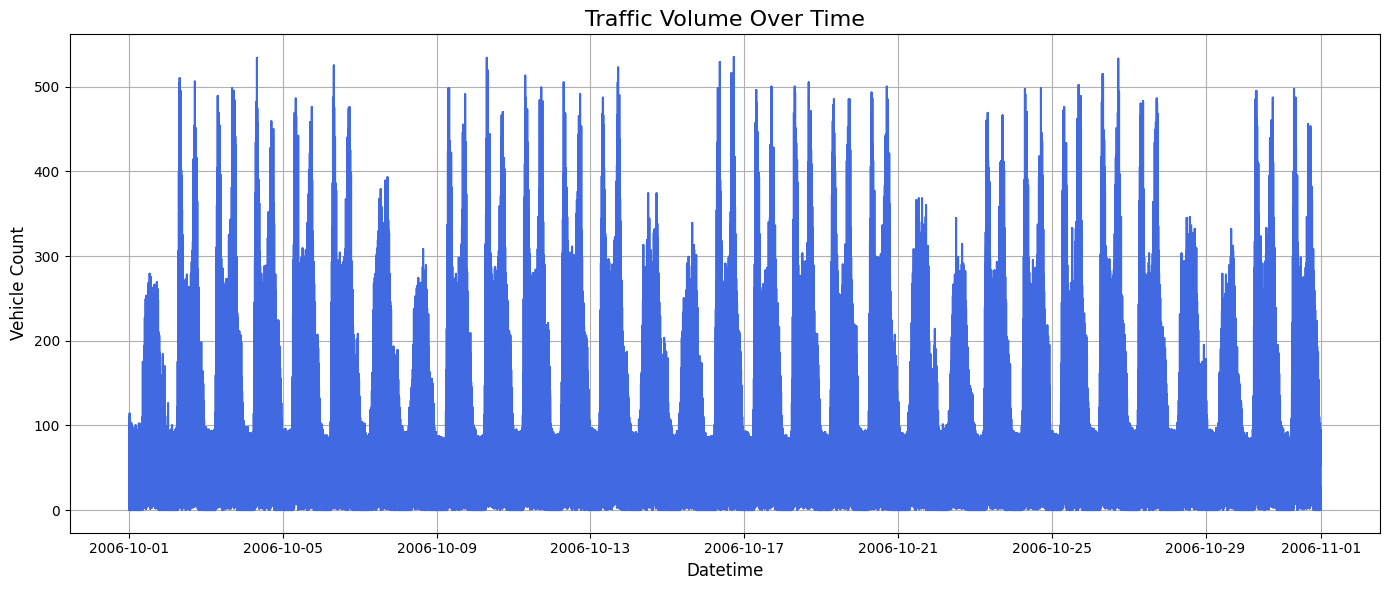

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

df = pd.read_csv('/content/cleaned_data.csv')

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

df = df.sort_values('Datetime')
df.set_index('Datetime', inplace=True)

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Volume'], color='royalblue')
plt.title("Traffic Volume Over Time", fontsize=16)
plt.xlabel("Datetime", fontsize=12)
plt.ylabel("Vehicle Count", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/cleaned_data.csv')

df['Date'] = pd.to_datetime(df['Date'])

daily_volume = df.groupby('Date')['Volume'].sum().reset_index()

# Normalizing
scaler = MinMaxScaler()
daily_volume['Volume_scaled'] = scaler.fit_transform(daily_volume[['Volume']])

# Create sequences for windowed data
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 5
X, y = create_sequences(daily_volume['Volume_scaled'].values, sequence_length)

# Reshape input for RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Building model
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')

history = model_rnn.fit(X, y, epochs=50, batch_size=16, validation_split=0.1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - loss: 0.8833 - val_loss: 0.5363
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.8538 - val_loss: 0.4926
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.7321 - val_loss: 0.4550
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.7262 - val_loss: 0.4230
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.6941 - val_loss: 0.3961
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.6227 - val_loss: 0.3711
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.5736 - val_loss: 0.3451
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5260 - val_loss: 0.3211
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.5207 - val_loss: 0.2989
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.4736 - val_loss: 0.2787
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.4062 - val_loss: 0.2587
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.3496 - val_loss: 0.2364
Epoch 13/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


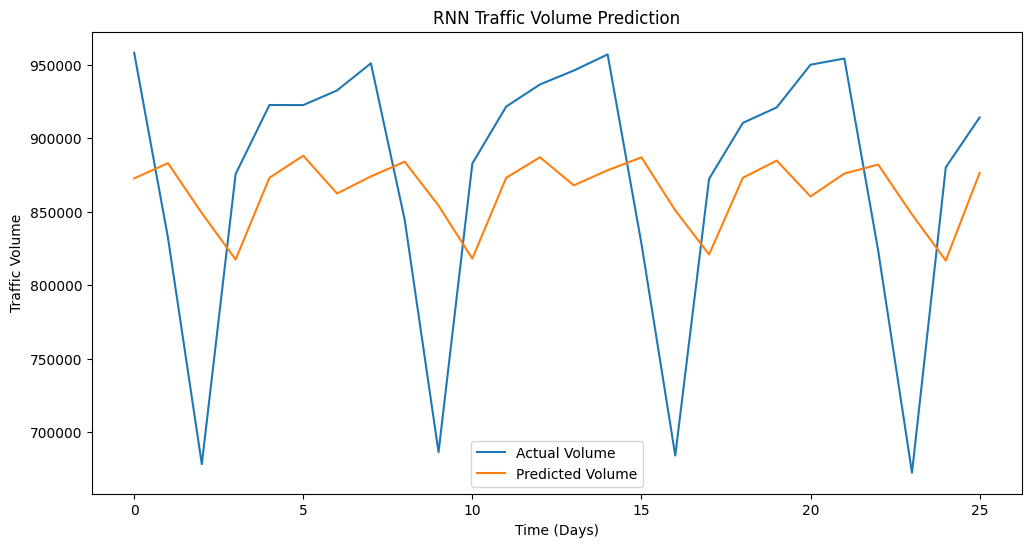

In [7]:
import matplotlib.pyplot as plt

y_pred = model_rnn.predict(X)

y_actual = scaler.inverse_transform(y.reshape(-1, 1))
y_predicted = scaler.inverse_transform(y_pred)

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_actual, label='Actual Volume')
plt.plot(y_predicted, label='Predicted Volume')
plt.legend()
plt.title('RNN Traffic Volume Prediction')
plt.xlabel('Time (Days)')
plt.ylabel('Traffic Volume')
plt.show()

In [8]:
model_rnn.save("rnn_traffic_model.h5")
